In [88]:
import numpy as np
import tensorflow 
import re
import keras  
import os
import glob 
from skimage import io 
import skimage
import random 
import matplotlib.pyplot as plt  
import cv2
from os import listdir
from os.path import isfile, join
from PIL import Image 
import pandas as pd
%matplotlib inline

In [68]:
data_path = 'data/archive/cat_dog_images'
labels_path = 'data/archive/cat_dog.csv'

## Explorando os Dados

### Carregando as imagens

In [27]:
mypath= data_path
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
cat_dog_images = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  cat_dog_images[n] = cv2.imread(join(mypath,onlyfiles[n]))

In [32]:
cat_dog_images[0].shape

(374, 500, 3)

### Exemplo de imgagens:

Text(0.5, 1.0, 'A dog')

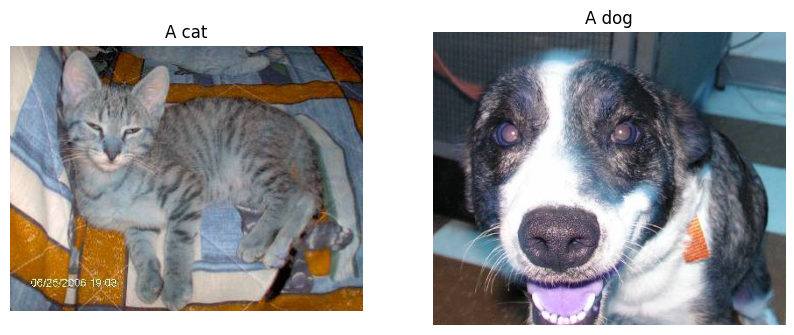

In [29]:
cat = cat_dog_images[2800]
dog = cat_dog_images[5400]
rows =1
columns =2
fig = plt.figure(figsize=(10, 7)) 
fig.add_subplot(rows, columns, 1)

plt.imshow(cat) 
plt.axis('off') 
plt.title("A cat")

fig.add_subplot(rows, columns, 2) 
plt.imshow(dog)
plt.axis('off')
plt.title("A dog")

### Analisando os canais RGB e a imagem original

In [102]:
def extract_numbers(input_values): 
    return ''.join(re.findall(r'\d', input_values))


In [106]:
labels = pd.read_csv(labels_path)
labels.columns
image_numbers = labels['image'].values
image_numbers = np.vectorize(extract_numbers)(image_numbers).astype(int)
image_numbers[2]

7970

In [78]:
cat_labels = labels.iloc[0:3000, :]
cat_labels

image  labels
9081      cat.0.jpg       0
5265      cat.1.jpg       0
18273    cat.10.jpg       0
1278    cat.100.jpg       0
1092   cat.1000.jpg       0
...             ...     ...
11491  cat.1443.jpg       0
22555  cat.1444.jpg       0
2111   cat.1445.jpg       0
20899  cat.1446.jpg       0
18479  cat.1447.jpg       0

[3000 rows x 2 columns]

### Carregando labels:

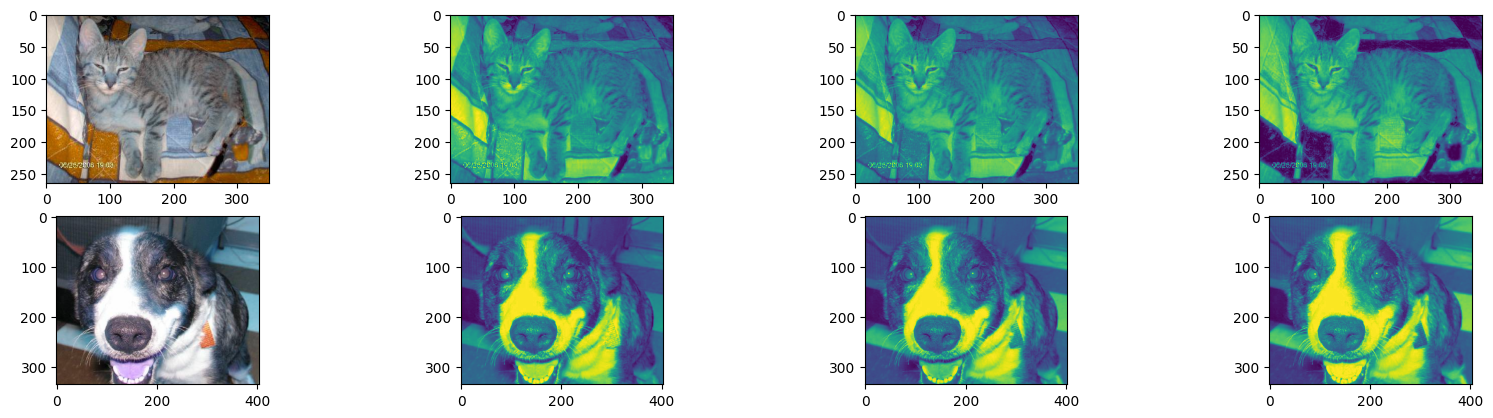

In [30]:
i, ((im1, im2, im3, im4), (im5, im6, im7, im8)) = plt.subplots(2, 4, sharey=False)
i.set_figwidth(20) 
im1.imshow(cat) 
im2.imshow(cat[:, : , 0]) #Red
im3.imshow(cat[:, : , 1]) #Green
im4.imshow(cat[:, : , 2]) #Blue
im5.imshow(dog) 
im6.imshow(dog[:, : , 0]) #Red
im7.imshow(dog[:, : , 1]) #Green
im8.imshow(dog[:, : , 2]) #Blue



## Pré-processamento das imagens

### Redimensionando as imagens:

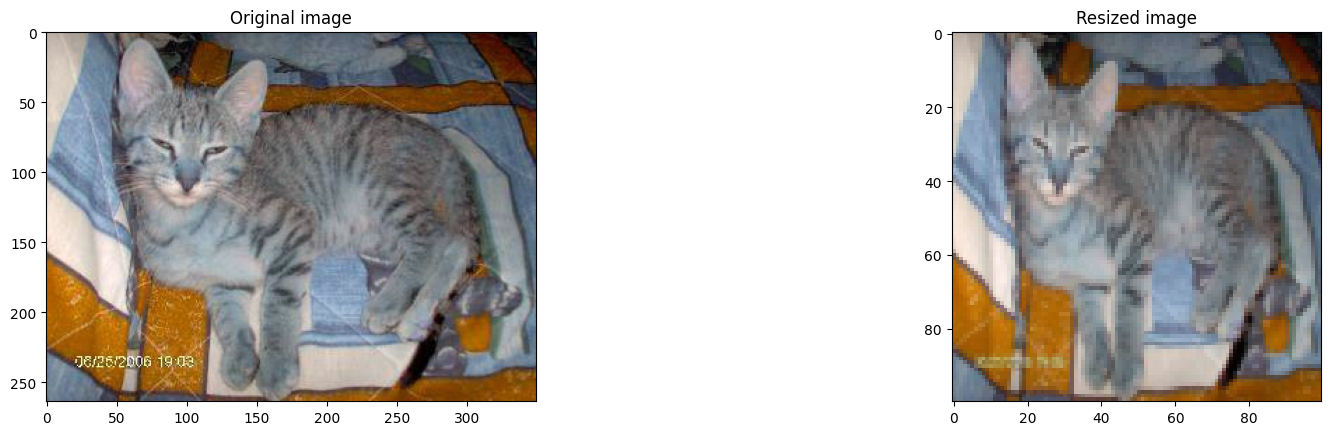

In [60]:
cat_resized = skimage.transform.resize(cat, (100, 100), anti_aliasing=True)
i, (im1, im2) = plt.subplots(1, 2, sharey=False)
i.set_figwidth(20)
im1.imshow(cat)
im1.title.set_text("Original image")
im2.imshow(cat_resized)
im2.title.set_text("Resized image")

In [64]:
for i in range(cat_dog_images.shape[0]):
    cat_dog_images[i] = skimage.transform.resize(cat_dog_images[i], (100, 100), anti_aliasing=True)

### Convertendo canais de cor para escala de cinza:

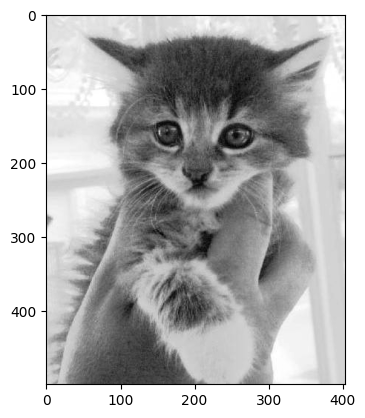

In [61]:
gray_cat = skimage.color.rgb2gray(cat_dog_images[3])
i, (im1) = plt.subplots(1, 1, sharey=False)
i.set_figwidth(20) 
im1.imshow(gray_cat, cmap='gray')

In [65]:
for i in range(cat_dog_images.shape[0]):
    cat_dog_images[i] = skimage.color.rgb2gray(cat_dog_images[i])

(100, 100)